# Data Exploration

# Testing

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

## Getting Data

In [2]:
date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-09-01
2020-09-02
2020-09-03
2020-09-04
2020-09-05
2020-09-06
2020-09-07
2020-09-08


In [3]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [4]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-09-01T00:00:51,5.30,NaN,NaN,1.77,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-09-01T00:03:23,8.00,NaN,NaN,1.83,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-09-01T00:05:59,3.43,NaN,NaN,1.70,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-09-01T00:08:29,5.40,NaN,NaN,2.00,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-09-01T00:11:00,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
580,6842,SDS011,3460,52.028,8.916,2020-09-08T23:50:09,19.97,NaN,NaN,17.83,NaN,NaN
581,6842,SDS011,3460,52.028,8.916,2020-09-08T23:52:36,20.30,NaN,NaN,18.20,NaN,NaN
582,6842,SDS011,3460,52.028,8.916,2020-09-08T23:55:02,21.53,NaN,NaN,18.57,NaN,NaN
583,6842,SDS011,3460,52.028,8.916,2020-09-08T23:57:29,21.97,NaN,NaN,19.23,NaN,NaN


In [5]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,4583.0,4583.0,4.583000e+03,4.583000e+03,4583.000000,0.0,0.0,4583.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,7.366720,NaN,NaN,4.533133,NaN,NaN
std,0.0,0.0,7.106203e-15,1.776551e-15,8.002269,NaN,NaN,5.645403,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.500000,NaN,NaN,0.400000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,3.900000,NaN,NaN,1.900000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,5.870000,NaN,NaN,3.070000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,8.770000,NaN,NaN,5.230000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,351.570000,NaN,NaN,213.230000,NaN,NaN


In [6]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [7]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-01 00:00:51,6842,SDS011,3460,52.028,8.916,5.30,NaN,NaN,1.77,NaN,NaN
2020-09-01 00:03:23,6842,SDS011,3460,52.028,8.916,8.00,NaN,NaN,1.83,NaN,NaN
2020-09-01 00:05:59,6842,SDS011,3460,52.028,8.916,3.43,NaN,NaN,1.70,NaN,NaN
2020-09-01 00:08:29,6842,SDS011,3460,52.028,8.916,5.40,NaN,NaN,2.00,NaN,NaN
2020-09-01 00:11:00,6842,SDS011,3460,52.028,8.916,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-08 23:50:09,6842,SDS011,3460,52.028,8.916,19.97,NaN,NaN,17.83,NaN,NaN
2020-09-08 23:52:36,6842,SDS011,3460,52.028,8.916,20.30,NaN,NaN,18.20,NaN,NaN
2020-09-08 23:55:02,6842,SDS011,3460,52.028,8.916,21.53,NaN,NaN,18.57,NaN,NaN


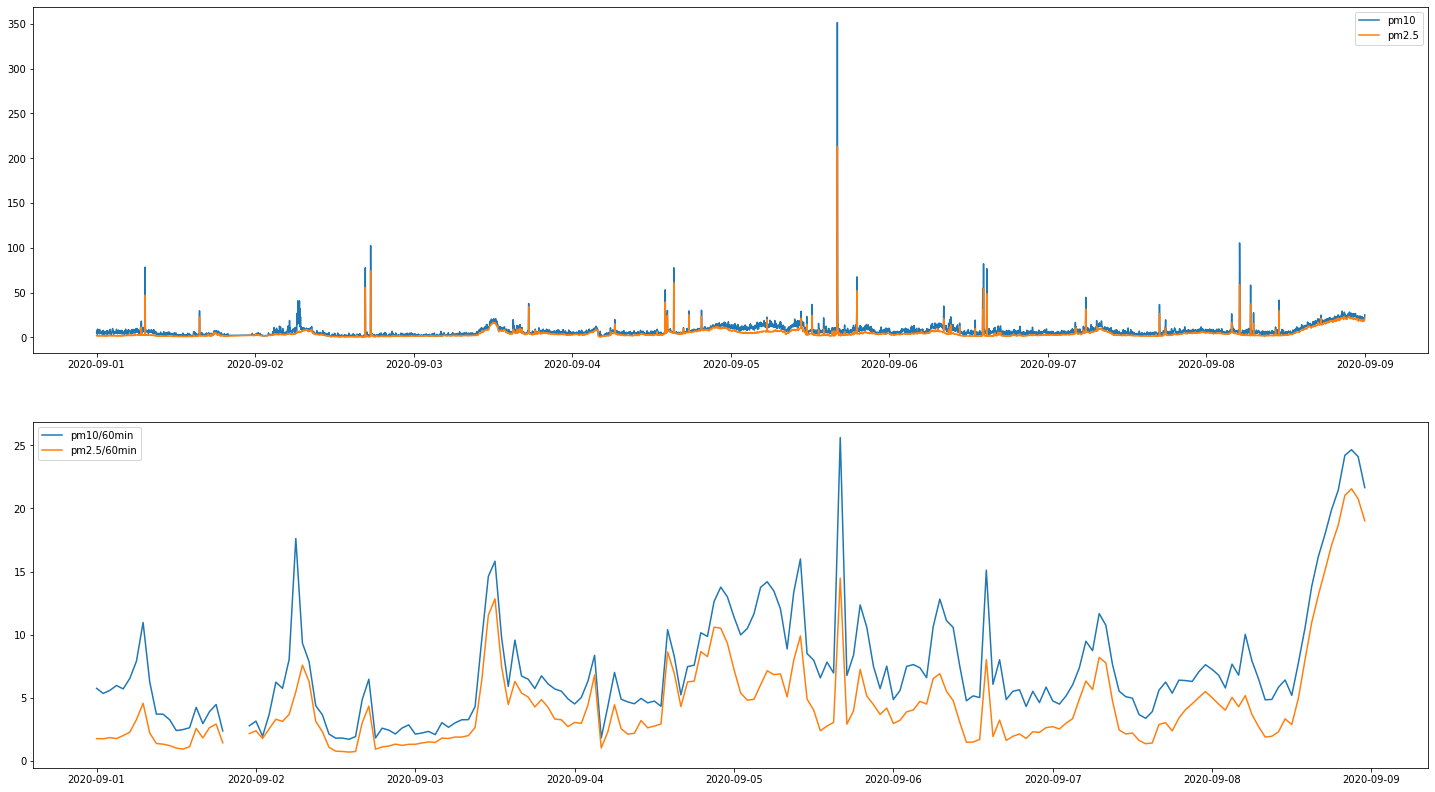

In [8]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

## Multiple Sensors

In [9]:
def get_sensor_data(SensorList):  
    SensorData = {}
    for sensor in SensorList:
        print(sensor)
        date = datetime.datetime.strptime('2020-09-05', '%Y-%m-%d').date()
        test = []
        comp = []
        while date < datetime.datetime.now().date():
            d = date.strftime('%Y-%m-%d')
            print(d)
            try:
                test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
            except:
                print("\tdoes not exist jet")
                break
            date += datetime.timedelta(days = 1)
        try:
            comp = test[0]
            for i in range(1, len(test)):
                comp = pd.concat([comp, test[i]], axis = 0)
            comp['timestamp'] = pd.to_datetime(comp['timestamp'])
            comp = comp.set_index('timestamp')
        except:
            print("\tno data")
        SensorData[sensor] = comp
    return SensorData

In [10]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]
SensorData = get_sensor_data(SensorList)

29366
2020-09-05
2020-09-06
2020-09-07
2020-09-08
10410
2020-09-05
2020-09-06
2020-09-07
2020-09-08
19004
2020-09-05
2020-09-06
2020-09-07
2020-09-08
30685
2020-09-05
2020-09-06
2020-09-07
2020-09-08
22543
2020-09-05
2020-09-06
2020-09-07
2020-09-08
3859
2020-09-05
2020-09-06
2020-09-07
2020-09-08
22725
2020-09-05
2020-09-06
2020-09-07
2020-09-08
1691
2020-09-05
2020-09-06
2020-09-07
2020-09-08
25343
2020-09-05
2020-09-06
2020-09-07
2020-09-08
48689
2020-09-05
2020-09-06
2020-09-07
2020-09-08
539
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
1180
2020-09-05
2020-09-06
2020-09-07
2020-09-08
5221
2020-09-05
2020-09-06
2020-09-07
2020-09-08
10029
2020-09-05
2020-09-06
2020-09-07
2020-09-08
26277
2020-09-05
2020-09-06
2020-09-07
2020-09-08
16954
2020-09-05
2020-09-06
2020-09-07
2020-09-08
8474
2020-09-05
2020-09-06
2020-09-07
2020-09-08
1226
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2187
2020-09-05
2020-09-06
2020-09-07
2020-09-08
3054
2020-09-05
2020-09-06
2020-09-07
2020-09-08
1

In [11]:
SensorData['4857']

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-05 00:04:27,4857,SDS011,2443,51.978,8.472,10.15,NaN,NaN,5.28,NaN,NaN
2020-09-05 00:09:23,4857,SDS011,2443,51.978,8.472,9.30,NaN,NaN,4.62,NaN,NaN
2020-09-05 00:14:20,4857,SDS011,2443,51.978,8.472,9.57,NaN,NaN,5.18,NaN,NaN
2020-09-05 00:19:16,4857,SDS011,2443,51.978,8.472,7.35,NaN,NaN,4.32,NaN,NaN
2020-09-05 00:24:12,4857,SDS011,2443,51.978,8.472,4.95,NaN,NaN,4.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-08 23:38:03,4857,SDS011,2443,51.978,8.472,14.07,NaN,NaN,10.48,NaN,NaN
2020-09-08 23:42:59,4857,SDS011,2443,51.978,8.472,15.38,NaN,NaN,10.25,NaN,NaN
2020-09-08 23:47:55,4857,SDS011,2443,51.978,8.472,14.48,NaN,NaN,10.05,NaN,NaN


## Getting a list of all sensors located in OWL

In [74]:
url = 'http://api.luftdaten.info/static/v1/data.json'
r = requests.get(url)
rdata = r.json()
df = pd.DataFrame(rdata)

In [75]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues
0,1813528916,NaN,2020-09-09 20:24:02,"{'id': 16260, 'latitude': '48.83539140002', 'l...","{'id': 29227, 'pin': '11', 'sensor_type': {'id...","[{'id': 3912263073, 'value': '24.5', 'value_ty..."
1,1813528915,NaN,2020-09-09 20:24:02,"{'id': 5809, 'latitude': '53.262', 'longitude'...","{'id': 11504, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3912263070, 'value': '9.33', 'value_ty..."
2,1813528914,NaN,2020-09-09 20:24:02,"{'id': 32455, 'latitude': '43.43', 'longitude'...","{'id': 46721, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3912263069, 'value': '0.13', 'value_ty..."
3,1813528913,NaN,2020-09-09 20:24:02,"{'id': 21029, 'latitude': '53.366', 'longitude...","{'id': 34812, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3912263067, 'value': '5', 'value_type'..."
4,1813528912,NaN,2020-09-09 20:24:02,"{'id': 2890, 'latitude': '51.95', 'longitude':...","{'id': 5731, 'pin': '7', 'sensor_type': {'id':...","[{'id': 3912263065, 'value': '16.50', 'value_t..."
...,...,...,...,...,...,...
46287,1813482398,NaN,2020-09-09 20:18:53,"{'id': 11279, 'latitude': '48.364', 'longitude...","{'id': 22220, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3912162344, 'value': '17.20', 'value_t..."
46288,1813482397,NaN,2020-09-09 20:18:53,"{'id': 25717, 'latitude': '48.58471660000', 'l...","{'id': 39456, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3912162342, 'value': '4.50', 'value_ty..."
46289,1813482396,NaN,2020-09-09 20:18:53,"{'id': 6892, 'latitude': '50.916', 'longitude'...","{'id': 13638, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3912162340, 'value': '18.90', 'value_t..."
46290,1813482395,NaN,2020-09-09 20:18:53,"{'id': 2228, 'latitude': '48.14', 'longitude':...","{'id': 4431, 'pin': '7', 'sensor_type': {'id':...","[{'id': 3912162338, 'value': '15.20', 'value_t..."


In [76]:
df.location[0]

{'id': 16260,
 'latitude': '48.83539140002',
 'longitude': '9.16928976774',
 'altitude': '278.5',
 'country': 'DE',
 'exact_location': 1,
 'indoor': 0}

In [77]:
df = df[df['location'].map(lambda x: 'DE' in x.values())]

In [78]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues
0,1813528916,NaN,2020-09-09 20:24:02,"{'id': 16260, 'latitude': '48.83539140002', 'l...","{'id': 29227, 'pin': '11', 'sensor_type': {'id...","[{'id': 3912263073, 'value': '24.5', 'value_ty..."
1,1813528915,NaN,2020-09-09 20:24:02,"{'id': 5809, 'latitude': '53.262', 'longitude'...","{'id': 11504, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3912263070, 'value': '9.33', 'value_ty..."
4,1813528912,NaN,2020-09-09 20:24:02,"{'id': 2890, 'latitude': '51.95', 'longitude':...","{'id': 5731, 'pin': '7', 'sensor_type': {'id':...","[{'id': 3912263065, 'value': '16.50', 'value_t..."
6,1813528910,NaN,2020-09-09 20:24:01,"{'id': 25679, 'latitude': '51.04', 'longitude'...","{'id': 39990, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3912263056, 'value': '7.20', 'value_ty..."
9,1813528907,NaN,2020-09-09 20:24:01,"{'id': 4117, 'latitude': '53.622', 'longitude'...","{'id': 8151, 'pin': '1', 'sensor_type': {'id':...","[{'id': 3912263051, 'value': '5.83', 'value_ty..."
...,...,...,...,...,...,...
46285,1813482400,NaN,2020-09-09 20:18:53,"{'id': 13034, 'latitude': '48.406', 'longitude...","{'id': 25025, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3912162348, 'value': '8.43', 'value_ty..."
46286,1813482399,NaN,2020-09-09 20:18:53,"{'id': 4116, 'latitude': '48.784', 'longitude'...","{'id': 8150, 'pin': '7', 'sensor_type': {'id':...","[{'id': 3912162346, 'value': '18.30', 'value_t..."
46287,1813482398,NaN,2020-09-09 20:18:53,"{'id': 11279, 'latitude': '48.364', 'longitude...","{'id': 22220, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3912162344, 'value': '17.20', 'value_t..."
46290,1813482395,NaN,2020-09-09 20:18:53,"{'id': 2228, 'latitude': '48.14', 'longitude':...","{'id': 4431, 'pin': '7', 'sensor_type': {'id':...","[{'id': 3912162338, 'value': '15.20', 'value_t..."


In [79]:
df.location

0        {'id': 16260, 'latitude': '48.83539140002', 'l...
1        {'id': 5809, 'latitude': '53.262', 'longitude'...
4        {'id': 2890, 'latitude': '51.95', 'longitude':...
6        {'id': 25679, 'latitude': '51.04', 'longitude'...
9        {'id': 4117, 'latitude': '53.622', 'longitude'...
                               ...                        
46285    {'id': 13034, 'latitude': '48.406', 'longitude...
46286    {'id': 4116, 'latitude': '48.784', 'longitude'...
46287    {'id': 11279, 'latitude': '48.364', 'longitude...
46290    {'id': 2228, 'latitude': '48.14', 'longitude':...
46291    {'id': 527, 'latitude': '48.726', 'longitude':...
Name: location, Length: 22628, dtype: object

In [102]:
# longitudes
northPoint = 8.3255
southPoint = 9.5537

# latitudes
westPoint = 52.2396
eastPoint = 51.4762

In [103]:
blabla = df['location'].apply(lambda x: (x.get('longitude'), x.get('latitude')) if (float(x.get('longitude')) >= northPoint) and (float(x.get('longitude')) <= southPoint) and (float(x.get('latitude')) >= eastPoint) and (float(x.get('latitude')) <= westPoint) else "FUCK")

In [104]:
blabla

0        FUCK
1        FUCK
4        FUCK
6        FUCK
9        FUCK
         ... 
46285    FUCK
46286    FUCK
46287    FUCK
46290    FUCK
46291    FUCK
Name: location, Length: 22628, dtype: object

In [105]:
blabla = blabla.to_frame()

In [106]:
blabla = blabla[blabla.location != "FUCK"]

In [107]:
blabla

,location
13,"(8.668, 51.744)"
46,"(8.484, 51.818)"
117,"(8.484, 51.818)"
126,"(8.606, 52.112)"
153,"(8.754, 51.712)"
...,...
45613,"(8.54078325000, 52.01168960000)"
45796,"(8.368, 51.712)"
45860,"(8.368, 51.712)"
46137,"(8.748, 51.716)"


In [108]:
owl_IDs = list(blabla.index.values)

In [109]:
len(owl_IDs)

436

In [110]:
df.loc[owl_IDs]

,id,sampling_rate,timestamp,location,sensor,sensordatavalues
13,1813528903,NaN,2020-09-09 20:24:01,"{'id': 6705, 'latitude': '51.744', 'longitude'...","{'id': 13273, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3912263043, 'value': '7.03', 'value_ty..."
46,1813528870,NaN,2020-09-09 20:24:01,"{'id': 2294, 'latitude': '51.818', 'longitude'...","{'id': 4564, 'pin': '7', 'sensor_type': {'id':...","[{'id': 3912262970, 'value': '18.00', 'value_t..."
117,1813528796,NaN,2020-09-09 20:24:01,"{'id': 2294, 'latitude': '51.818', 'longitude'...","{'id': 4563, 'pin': '1', 'sensor_type': {'id':...","[{'id': 3912262810, 'value': '3.93', 'value_ty..."
126,1813528787,NaN,2020-09-09 20:24:01,"{'id': 5251, 'latitude': '52.112', 'longitude'...","{'id': 10411, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3912262790, 'value': '20.60', 'value_t..."
153,1813528760,NaN,2020-09-09 20:24:01,"{'id': 10660, 'latitude': '51.712', 'longitude...","{'id': 21005, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3912262735, 'value': '20.50', 'value_t..."
...,...,...,...,...,...,...
45613,1813483075,NaN,2020-09-09 20:18:59,"{'id': 13131, 'latitude': '52.01168960000', 'l...","{'id': 1226, 'pin': '1', 'sensor_type': {'id':...","[{'id': 3912163806, 'value': '2.73', 'value_ty..."
45796,1813482890,NaN,2020-09-09 20:18:56,"{'id': 12221, 'latitude': '51.712', 'longitude...","{'id': 24015, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3912163392, 'value': '18.70', 'value_t..."
45860,1813482826,NaN,2020-09-09 20:18:55,"{'id': 12221, 'latitude': '51.712', 'longitude...","{'id': 24014, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3912163254, 'value': '6.20', 'value_ty..."
46137,1813482548,NaN,2020-09-09 20:18:54,"{'id': 1548, 'latitude': '51.716', 'longitude'...","{'id': 3075, 'pin': '7', 'sensor_type': {'id':...","[{'id': 3912162668, 'value': '18.20', 'value_t..."


In [111]:
sensorList = list(df.loc[owl_IDs].sensor.apply(lambda x: x.get('id')).values)

In [112]:
len(sensorList)

436